In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.stats import weightstats as stests
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import missingno as msno
from sklearn.preprocessing import StandardScaler

# Loading the Dataset in CSV File

In [ ]:
DF = pd.read_csv("/content/Air Quality Index.csv")

# 16 Features of Collected Dataset

In [ ]:
DF.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# To get description of data

In [ ]:
DF.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# To get null values

In [ ]:
DF.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
DF.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
DF.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


# Feature Selction

In [ ]:
Data = DF[['PM2.5', 'PM10', 'NO2', 'CO','SO2','O3','AQI','AQI_Bucket']]

In [ ]:
Data.head()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
0,NaN,NaN,18.22,0.92,27.64,133.36,NaN,NaN
1,NaN,NaN,15.69,0.97,24.55,34.06,NaN,NaN
2,NaN,NaN,19.30,17.40,29.07,30.70,NaN,NaN
3,NaN,NaN,18.48,1.70,18.59,36.08,NaN,NaN
4,NaN,NaN,21.42,22.10,39.33,39.31,NaN,NaN


In [ ]:
Data.tail()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
29526,15.02,50.94,25.06,0.47,8.55,23.30,41.0,Good
29527,24.38,74.09,26.06,0.52,12.72,30.14,70.0,Satisfactory
29528,22.91,65.73,29.53,0.48,8.42,30.96,68.0,Satisfactory
29529,16.64,49.97,29.26,0.52,9.84,28.30,54.0,Satisfactory
29530,15.00,66.00,26.85,0.59,2.10,17.05,50.0,Good


In [ ]:
Data.shape

(29531, 8)

# After Features Selection

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24933 non-null  float64
 1   PM10        18391 non-null  float64
 2   NO2         25946 non-null  float64
 3   CO          27472 non-null  float64
 4   SO2         25677 non-null  float64
 5   O3          25509 non-null  float64
 6   AQI         24850 non-null  float64
 7   AQI_Bucket  24850 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.8+ MB


# Selected Features Description

In [ ]:
Data.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,24933.000000,18391.000000,25946.000000,27472.000000,25677.000000,25509.000000,24850.000000
mean,67.450578,118.127103,28.560659,2.248598,14.531977,34.491430,166.463581
std,64.661449,90.605110,24.474746,6.962884,18.133775,21.694928,140.696585
min,0.040000,0.010000,0.010000,0.000000,0.010000,0.010000,13.000000
25%,28.820000,56.255000,11.750000,0.510000,5.670000,18.860000,81.000000
50%,48.570000,95.680000,21.690000,0.890000,9.160000,30.840000,118.000000
75%,80.590000,149.745000,37.620000,1.450000,15.220000,45.570000,208.000000
max,949.990000,1000.000000,362.210000,175.810000,193.860000,257.730000,2049.000000


# Null Values

In [ ]:
Data.isnull().sum()

PM2.5          4598
PM10          11140
NO2            3585
CO             2059
SO2            3854
O3             4022
AQI            4681
AQI_Bucket     4681
dtype: int64

# Data Preprocessing

# Dropped Missing values

In [ ]:
print("Before Dropped missing values: ",Data.shape)
Data = Data.dropna()
print("After Dropped  missing values: ",Data.shape)

Before Dropped missing values:  (29531, 8)
After Dropped  missing values:  (16010, 8)


# Removing Duplicate Rows

In [ ]:
Data.shape

(16010, 8)

In [ ]:
Data = Data.drop_duplicates()
Data.shape

(16010, 8)

# Data Normalization

In [ ]:
scaler = StandardScaler()
Scale_Data = scaler.fit_transform(Data.iloc[:,0:7])
Data.iloc[:,0:7] = Scale_Data
Data

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
1595,-0.379939,0.053255,2.453282,3.845016,11.131230,0.608491,1.338584,Poor
1596,-0.448660,-0.015573,2.216309,3.729483,5.814732,0.777133,1.808281,Very Poor
1597,-0.419674,0.139827,2.124323,4.673471,6.340084,0.179221,2.057509,Very Poor
1598,-0.445972,0.232954,2.020072,3.334980,5.622078,0.329280,2.086266,Very Poor
1599,-0.454035,-0.067448,1.742800,9.334236,5.047082,0.084448,3.888371,Severe
...,...,...,...,...,...,...,...,...
29526,-0.812419,-0.754486,-0.177516,-0.271900,-0.313875,-0.549701,-0.961976,Good
29527,-0.632747,-0.492849,-0.133713,-0.257811,-0.004888,-0.231930,-0.683992,Satisfactory
29528,-0.660965,-0.587332,0.018283,-0.269082,-0.323508,-0.193834,-0.703163,Satisfactory
29529,-0.781322,-0.765449,0.006456,-0.257811,-0.218289,-0.317412,-0.837363,Satisfactory


In [ ]:
Data.shape

(16010, 8)

# Handling Outliers

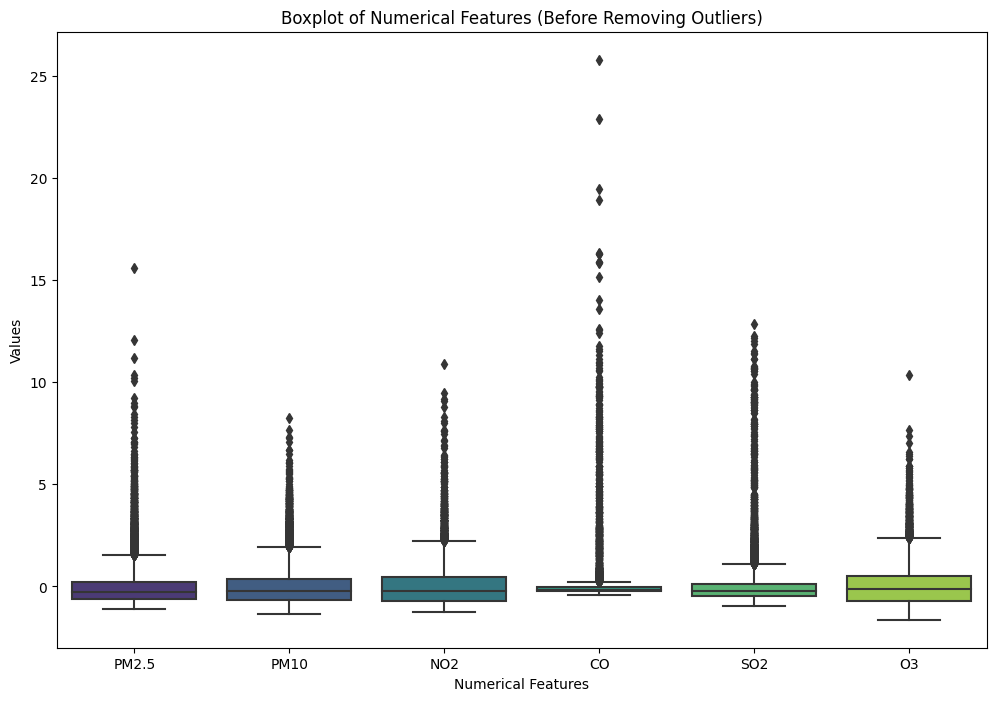

In [ ]:
numerical_features = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Create a boxplot for each numerical feature before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=Data[numerical_features], palette='viridis')
plt.title('Boxplot of Numerical Features (Before Removing Outliers)')
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.show()

In [ ]:
# Remove outliers using z-score
from scipy.stats import zscore

z_scores = zscore(Data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']])
balanced_data = Data[(z_scores < 3).all(axis=1)]
balanced_data.shape

(15007, 8)

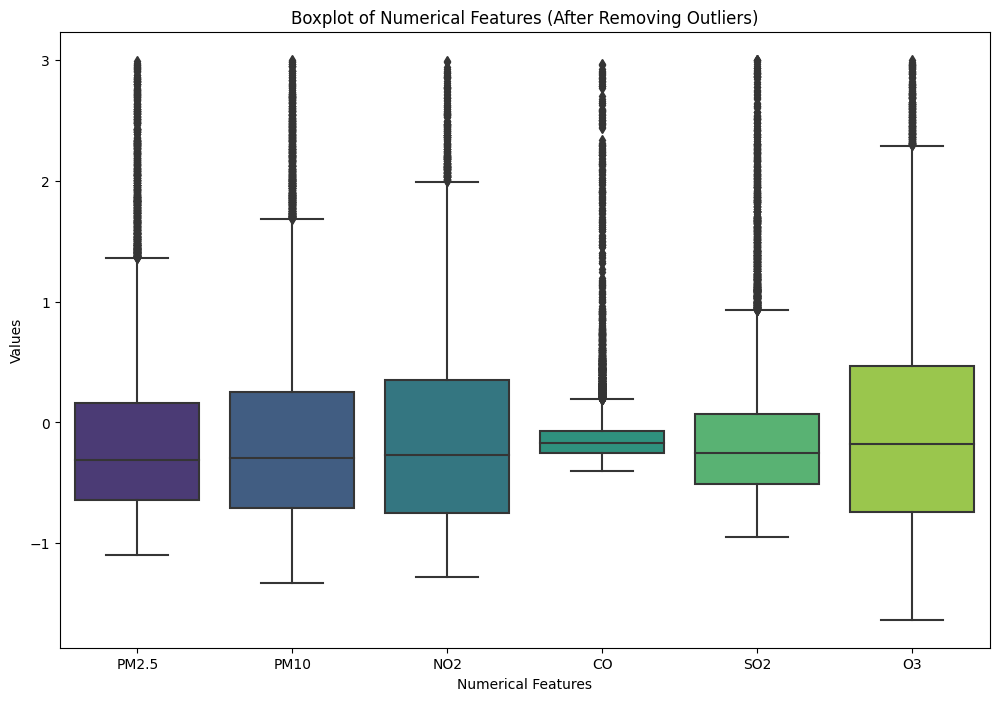

In [ ]:
# Assuming 'balanced_data' is your DataFrame after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=balanced_data[numerical_features], palette='viridis')
plt.title('Boxplot of Numerical Features (After Removing Outliers)')
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.show()


In [ ]:
Data['AQI_Bucket'].value_counts()

Satisfactory    6061
Moderate        5750
Poor            1566
Good            1106
Very Poor       1057
Severe           470
Name: AQI_Bucket, dtype: int64

In [ ]:
print(Data.shape)

(16010, 8)


# data Visualization (Unbalance data)

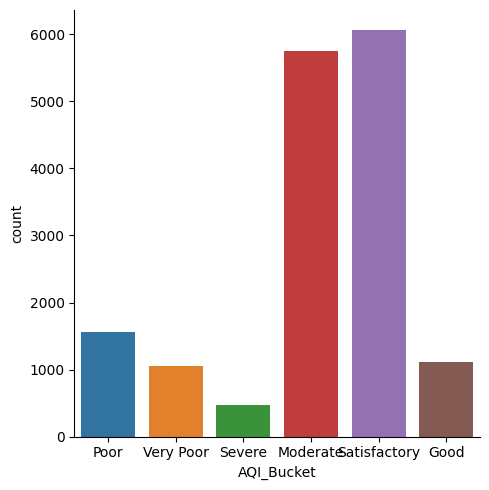

In [ ]:
plot = sns.catplot(x="AQI_Bucket",data=Data,kind="count")

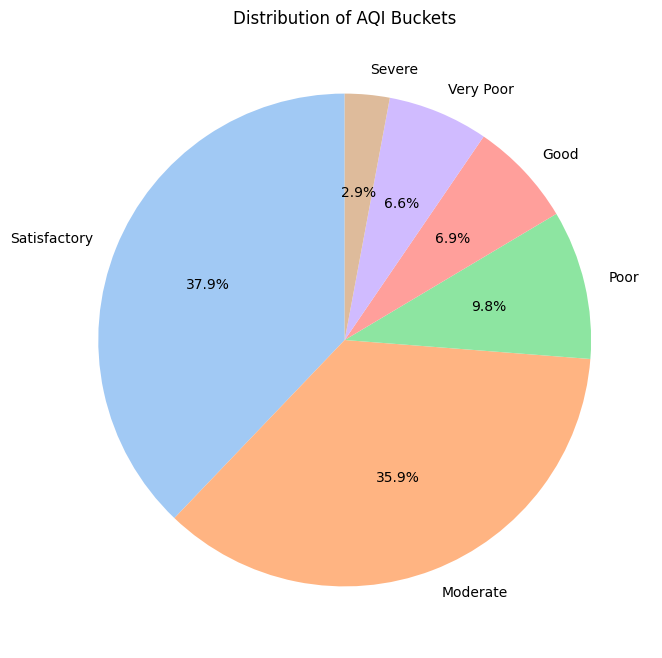

In [ ]:
data_counts = Data['AQI_Bucket'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of AQI Buckets')
plt.show()


In [ ]:
from sklearn.utils import resample

# Assuming Data is your DataFrame
# Separate 'Satisfactory' and 'Moderate' classes
satisfactory_class = Data[Data['AQI_Bucket'] == 'Satisfactory']
moderate_class = Data[Data['AQI_Bucket'] == 'Moderate']

# Set the maximum number of samples to keep for each class
max_samples = 1800

# If the class has more samples than the maximum, randomly sample max_samples
if len(satisfactory_class) > max_samples:
    satisfactory_class = resample(satisfactory_class, replace=False, n_samples=max_samples, random_state=42)

if len(moderate_class) > max_samples:
    moderate_class = resample(moderate_class, replace=False, n_samples=max_samples, random_state=42)

# Combine the remaining classes
remaining_classes = Data[(Data['AQI_Bucket'] != 'Satisfactory') & (Data['AQI_Bucket'] != 'Moderate')]

# Create the final balanced dataset
balanced_data = pd.concat([satisfactory_class, moderate_class, remaining_classes])


# data Visualization (Data balanced)

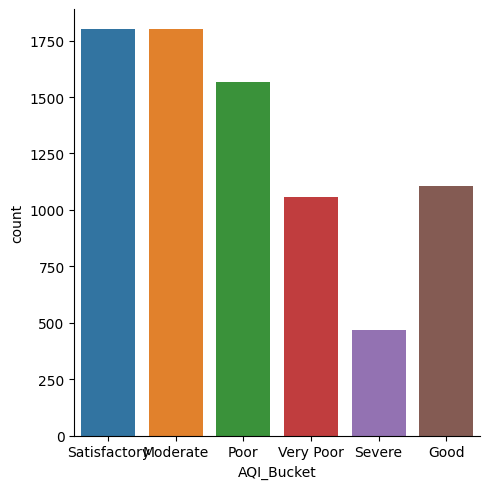

In [ ]:
plot = sns.catplot(x="AQI_Bucket",data=balanced_data,kind="count")

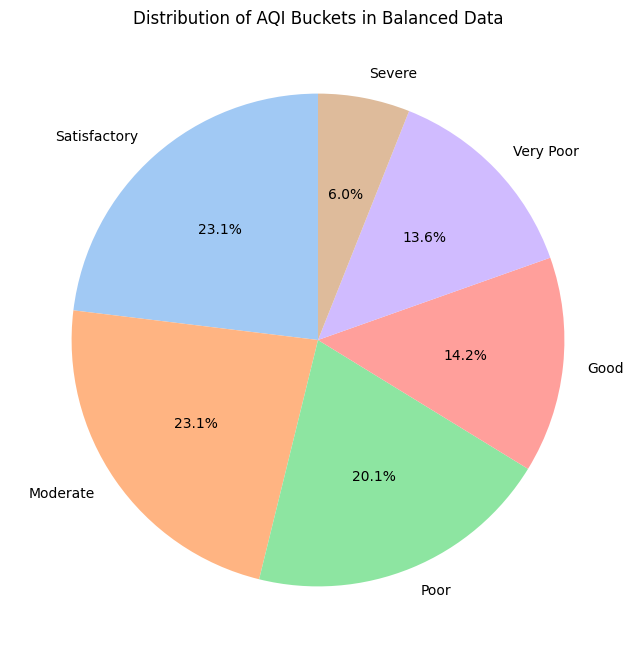

In [ ]:
data_counts = balanced_data['AQI_Bucket'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of AQI Buckets in Balanced Data')
plt.show()

# Correlation of the variables

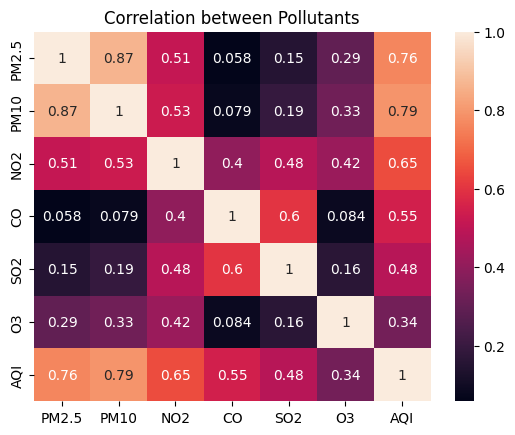

In [ ]:
correlation = balanced_data[['PM2.5', 'PM10', 'NO2', 'CO','SO2','O3','AQI']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation between Pollutants')
plt.show()

In [ ]:
balanced_data.shape

(7799, 8)

# Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split
X = balanced_data[['PM2.5', 'PM10','NO2', 'CO', 'SO2', 'O3']]
y = balanced_data["AQI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
# X = Data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]
# y = Data['AQI']
X = balanced_data[['PM2.5', 'PM10','NO2', 'CO', 'SO2', 'O3']]
y = balanced_data["AQI"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Train Multiple Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train XGBoost Regression model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from joblib import dump

dump(rf_model, 'RFR_Model.joblib')
dump(svr_model, 'SVR_Model.joblib')
dump(xgb_model, 'XGB_Model.joblib')

['XGB_Model.joblib']

In [ ]:

from joblib import load
x = np.array([68.99, 189.57, 27.86, 1.07, 11.69, 91.18])
# Load the saved model
loaded_model = load('/content/MLR_Model.joblib')
predictions = loaded_model.predict(x.reshape(1,6))
print(predictions)

[197.24934406]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import warnings

# Load the saved model
loaded_model = load('/content/MLR_Model.joblib')

# Ignore the specific warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    predictions = loaded_model.predict([[68.99, 189.57, 27.86, 1.07, 11.69, 91.18]])
print(predictions)


[197.24934406]


In [ ]:
DD = balanced_data.loc[:,['AQI','AQI_Bucket']]
DD[(DD['AQI'] >=501 ) & (DD['AQI'] <=800 )]

,AQI,AQI_Bucket
1599,547.0,Severe
1606,558.0,Severe
1610,515.0,Severe
1631,565.0,Severe
1639,517.0,Severe
...,...,...
14881,502.0,Severe
14995,510.0,Severe
26374,525.0,Severe
26377,509.0,Severe


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
linear_predictions = linear_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.4f}")
    print("\n")


evaluate_model(y_test, svr_predictions, 'Support Vector Regression')
evaluate_model(y_test, linear_predictions, 'Multiple Linear Regression')
evaluate_model(y_test, rf_predictions, 'Random Forest Regression')
evaluate_model(y_test, xgb_predictions, 'XGBoost Regression')

Support Vector Regression Metrics:
MAE: 30.23
MSE: 3341.03
R-squared: 0.7840


Multiple Linear Regression Metrics:
MAE: 27.81
MSE: 1796.14
R-squared: 0.8839


Random Forest Regression Metrics:
MAE: 20.28
MSE: 1110.52
R-squared: 0.9282


XGBoost Regression Metrics:
MAE: 20.96
MSE: 1166.82
R-squared: 0.9246




# Multiple Linear Regression Accuracy

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train Multiple Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.4f}")
    print("\n")

evaluate_model(y_test, linear_predictions, 'Multiple Linear Regression')


Multiple Linear Regression Metrics:
MAE: 0.27
MSE: 0.17
R-squared: 0.8839




# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.4f}")
    print("\n")

evaluate_model(y_test, svr_predictions, 'Support Vector Regression')

Support Vector Regression Metrics:
MAE: 0.20
MSE: 0.11
R-squared: 0.9248




# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.4f}")
    print("\n")

evaluate_model(y_test, rf_predictions, 'Random Forest Regression')

Random Forest Regression Metrics:
MAE: 0.19
MSE: 0.10
R-squared: 0.9287




# XGBoost Regression

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train XGBoost Regression model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.4f}")
    print("\n")

evaluate_model(y_test, xgb_predictions, 'XGBoost Regression')

XGBoost Regression Metrics:
MAE: 0.20
MSE: 0.11
R-squared: 0.9246




# Result of Model

In [ ]:
xgb_model.predict([X_train.iloc[0,:]])

array([-0.9823827], dtype=float32)

In [ ]:
evaluate_model(y_test, svr_predictions, 'Support Vector Regression')
evaluate_model(y_test, linear_predictions, 'Multiple Linear Regression')
evaluate_model(y_test, rf_predictions, 'Random Forest Regression')
evaluate_model(y_test, xgb_predictions, 'XGBoost Regression')

Support Vector Regression Metrics:
MAE: 0.20
MSE: 0.11
R-squared: 0.9248


Multiple Linear Regression Metrics:
MAE: 0.27
MSE: 0.17
R-squared: 0.8839


Random Forest Regression Metrics:
MAE: 0.19
MSE: 0.10
R-squared: 0.9287


XGBoost Regression Metrics:
MAE: 0.20
MSE: 0.11
R-squared: 0.9246




In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

In [ ]:
Xtrain = poly.fit_transform(X_train)
xtest = poly.transform(X_test)

In [ ]:
correlation_matrix = balanced_data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()

# Display correlation matrix
print(correlation_matrix)

          PM2.5      PM10       NO2        CO       SO2        O3       AQI
PM2.5  1.000000  0.865746  0.511371  0.058053  0.150702  0.294710  0.764262
PM10   0.865746  1.000000  0.531847  0.079105  0.192620  0.329734  0.792625
NO2    0.511371  0.531847  1.000000  0.397212  0.482418  0.420229  0.647749
CO     0.058053  0.079105  0.397212  1.000000  0.599487  0.083944  0.547403
SO2    0.150702  0.192620  0.482418  0.599487  1.000000  0.163206  0.483308
O3     0.294710  0.329734  0.420229  0.083944  0.163206  1.000000  0.335298
AQI    0.764262  0.792625  0.647749  0.547403  0.483308  0.335298  1.000000


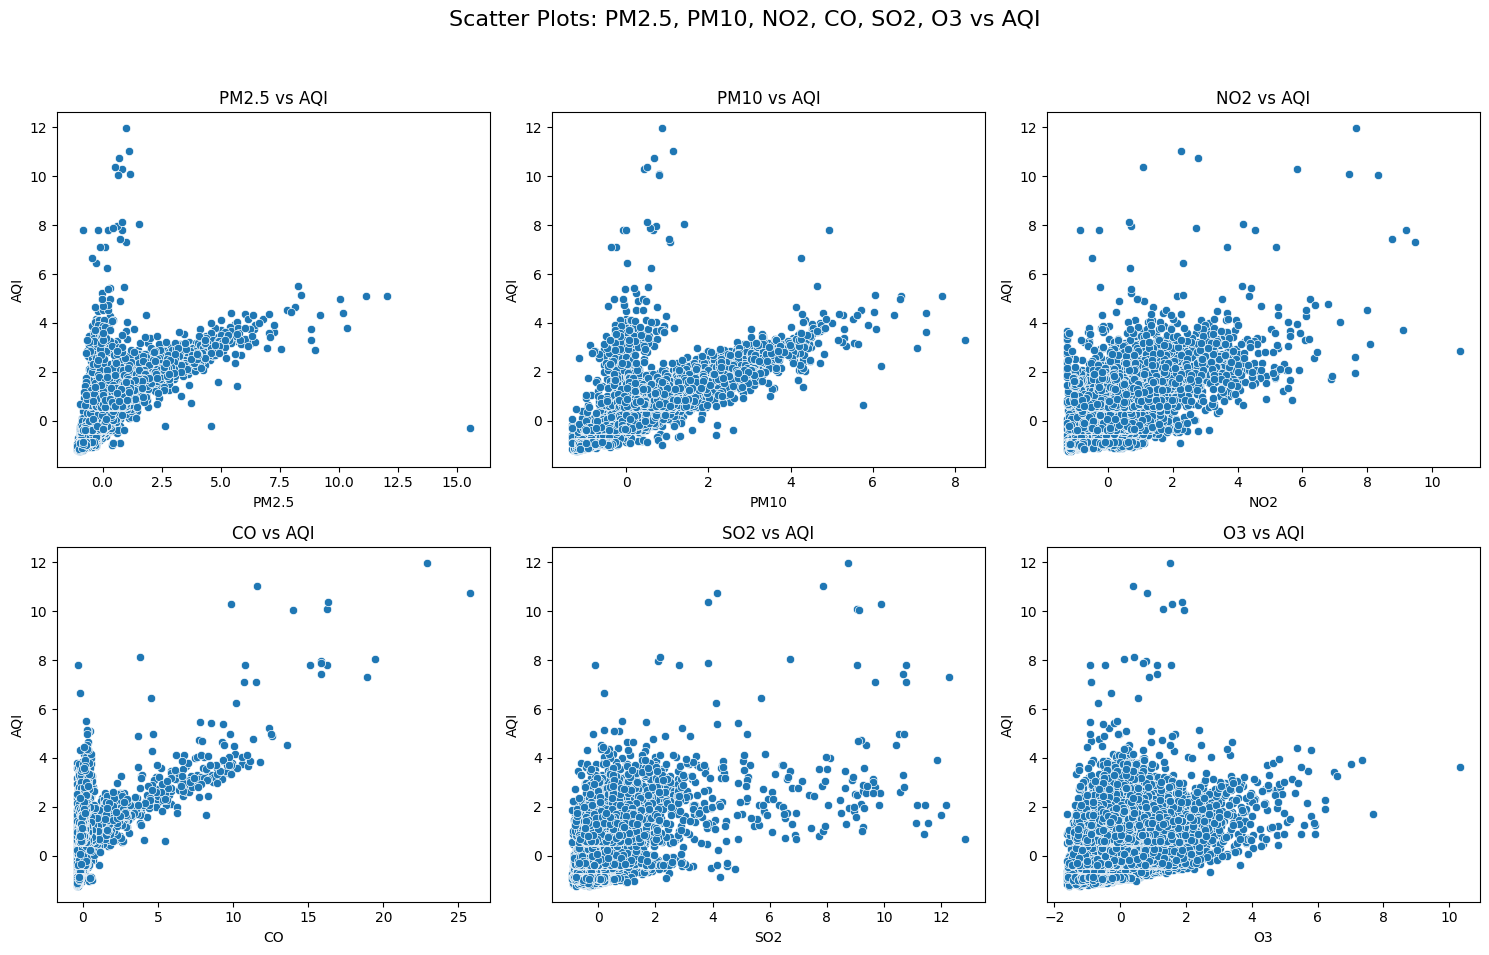

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
target_variable = 'AQI'


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle(f'Scatter Plots: {", ".join(features)} vs {target_variable}', fontsize=16)

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(x=balanced_data[feature], y=balanced_data[target_variable], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs {target_variable}')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
